# 1. Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
%matplotlib inline

# 2. Load Data

In [5]:
# train_data = pd.read_csv('/content/drive/MyDrive/datastorm/train_kaggle.csv')
# test_data = pd.read_csv('/content/drive/MyDrive/datastorm/test_kaggle.csv')

<ipython-input-5-1dbdf4331987>:1: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv('/content/drive/MyDrive/datastorm/train_kaggle.csv')


In [ ]:
train_data = pd.read_csv('train_kaggle.csv')
test_data = pd.read_csv('test_kaggle.csv')

In [9]:
# Display first few rows of the datasets
print("Train Data:")
train_data.head()

Train Data:


,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory
0,10493832.0,Kelaniya,1209.6,756.0,5292.0,4
1,10178643.0,Moratuwa,1590.12,1060.08,6007.12,1
2,10513916.0,Wattala,2288.88,1481.04,9155.52,4
3,10334589.0,Wattala,2274.94,1739.66,9099.76,4
4,10458365.0,Kelaniya,2345.49,2069.55,9243.99,4


In [10]:
print("Test Data:")
test_data.head()

Test Data:


,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales
0,33574,batticaloa,2686.5,3582,12537
1,10089,batticaloa,1717.56,2576.34,9446.58
2,38329,batticaloa,854.04,1242.24,5201.88
3,11376,batticaloa,1638.12,2320.67,9282.68
4,12410,batticaloa,1039.09,1518.67,5435.24


# 3. Data preprocessing

In [11]:
# Correct the typo in column name
train_data.rename(columns={'cluster_catgeory': 'cluster_category'}, inplace=True)

## 3.1 Handling missing values and Converting text to numeric values

In [12]:
# Convert 'null' strings to NaN
train_data.replace('null', np.nan, inplace=True)
test_data.replace('null', np.nan, inplace=True)
train_data.replace('nul', np.nan, inplace=True)
test_data.replace('nul', np.nan, inplace=True)

In [13]:
# Check for missing values in train and test data
print("Missing values in train data:")
print(train_data.isnull().sum())
print("\nMissing values in test data:")
print(test_data.isnull().sum())


Missing values in train data:
Customer_ID          2
outlet_city          2
luxury_sales        38
fresh_sales         45
dry_sales           37
cluster_category     1
dtype: int64

Missing values in test data:
Customer_ID     0
outlet_city     0
luxury_sales    0
fresh_sales     0
dry_sales       0
dtype: int64


In [14]:
# Total number of rows in the train dataset
total_rows_train = train_data.shape[0]

# Percentage of missing values in each column of train data
missing_percentage_train = (train_data.isnull().sum() / total_rows_train) * 100

print("Percentage of missing values in train data:")
print(missing_percentage_train)


Percentage of missing values in train data:
Customer_ID         0.000258
outlet_city         0.000258
luxury_sales        0.004909
fresh_sales         0.005813
dry_sales           0.004779
cluster_category    0.000129
dtype: float64


In [15]:
# Drop rows with missing 'outlet_city' and 'cluster_category'
train_data.dropna(subset=['outlet_city','cluster_category'], inplace=True)


In [17]:
# Check for missing values in train data
print("Missing values in train data:")
print(train_data.isnull().sum())


Missing values in train data:
Customer_ID          2
outlet_city          0
luxury_sales        38
fresh_sales         45
dry_sales           37
cluster_category     0
dtype: int64


In [18]:
non_numeric_rows_luxury = train_data[pd.to_numeric(train_data['luxury_sales'], errors='coerce').isna()]
non_numeric_rows_fresh = train_data[pd.to_numeric(train_data['fresh_sales'], errors='coerce').isna()]
non_numeric_rows_dry = train_data[pd.to_numeric(train_data['dry_sales'], errors='coerce').isna()]

#Get the count of non-numeric rows
count_luxury = len(non_numeric_rows_luxury)
count_fresh = len(non_numeric_rows_fresh)
count_dry = len(non_numeric_rows_dry)

print(f"The number of rows with non-numeric values in 'luxury_sales' column in train_data is: {count_luxury}")
print(f"The number of rows with non-numeric values in 'fresh_sales' column in train_data is: {count_fresh}")
print(f"The number of rows with non-numeric values in 'dry_sales' column in train_data is: {count_dry}")


The number of rows with non-numeric values in 'luxury_sales' column in train_data is: 45
The number of rows with non-numeric values in 'fresh_sales' column in train_data is: 50
The number of rows with non-numeric values in 'dry_sales' column in train_data is: 38


In [19]:
non_numeric_rows_luxury = test_data[pd.to_numeric(test_data['luxury_sales'], errors='coerce').isna()]
non_numeric_rows_fresh = test_data[pd.to_numeric(test_data['fresh_sales'], errors='coerce').isna()]
non_numeric_rows_dry = test_data[pd.to_numeric(test_data['dry_sales'], errors='coerce').isna()]

# Get the count of non-numeric rows
count_luxury = len(non_numeric_rows_luxury)
count_fresh = len(non_numeric_rows_fresh)
count_dry = len(non_numeric_rows_dry)

print(f"The number of rows with non-numeric values in 'luxury_sales' column in test_data is: {count_luxury}")
print(f"The number of rows with non-numeric values in 'fresh_sales' column in test_data is: {count_fresh}")
print(f"The number of rows with non-numeric values in 'dry_sales' column in test_data is: {count_dry}")

The number of rows with non-numeric values in 'luxury_sales' column in test_data is: 2
The number of rows with non-numeric values in 'fresh_sales' column in test_data is: 1
The number of rows with non-numeric values in 'dry_sales' column in test_data is: 1


In [20]:
def text_to_number(input):
    #if input is already a number return
    try:
        return float(input)
    except ValueError:
        pass


    # Define the mapping dictionary
    mapping_dict = {
        'one thousand four hundread ruppes': 1400,
        'eight hundread ruppess': 800,
        'six hundread and hirty': 630,
        'thousand tow hundread': 1200,
        'seven hundread and nine ruppees': 709,
        'three thousand two hundread ruppess': 3200,
        'four thousand one hundread ruppess': 4100,
        'six hundread and five ruppes': 605,
        'three thousana and five hundread': 3500,
        'thirteen thousand ruppes': 13000,
        'five thousand ruppes': 5000,
        'two thousand seven hundread ruppess': 2700,
        'four thousand and two hundread ruppes': 4200,
        'seven hundread and sixty ruppees': 760,
        'eight hundread and fifteen ruppes': 815,
        'nine thousand ruppess': 9000,
        'three thousand seven hundread ruppees': 3700
    }

    # Trim text and convert to lowercase
    cleaned_text = input.strip().lower()

    # Look up the corresponding number in the mapping dictionary
    return mapping_dict.get(cleaned_text, None)

In [ ]:
# Get the rows containing strings in the sales columns
text_rows_luxury = train_data[pd.to_numeric(train_data['luxury_sales'], errors='coerce').isna()]
text_rows_fresh = train_data[pd.to_numeric(train_data['fresh_sales'], errors='coerce').isna()]
text_rows_dry = train_data[pd.to_numeric(train_data['dry_sales'], errors='coerce').isna()]


# Apply the conversion function only to the rows containing strings
text_rows_luxury['luxury_sales'] = text_rows_luxury['luxury_sales'].apply(lambda x: text_to_number(str(x)))
text_rows_fresh['fresh_sales'] = text_rows_fresh['fresh_sales'].apply(lambda x: text_to_number(str(x)))
text_rows_dry['dry_sales'] = text_rows_dry['dry_sales'].apply(lambda x: text_to_number(str(x)))

# Update the original DataFrame with the converted values
train_data.update(text_rows_luxury)
train_data.update(text_rows_fresh)
train_data.update(text_rows_dry)


/tmp/ipykernel_18/2809564284.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_rows_luxury['luxury_sales'] = text_rows_luxury['luxury_sales'].apply(lambda x: text_to_number(str(x)))
/tmp/ipykernel_18/2809564284.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_rows_fresh['fresh_sales'] = text_rows_fresh['fresh_sales'].apply(lambda x: text_to_number(str(x)))
/tmp/ipykernel_18/2809564284.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

In [21]:
non_numeric_rows_luxury = train_data[pd.to_numeric(train_data['luxury_sales'], errors='coerce').isna()]
non_numeric_rows_fresh = train_data[pd.to_numeric(train_data['fresh_sales'], errors='coerce').isna()]
non_numeric_rows_dry = train_data[pd.to_numeric(train_data['dry_sales'], errors='coerce').isna()]

# Get the count of non-numeric rows
count_luxury = len(non_numeric_rows_luxury)
count_fresh = len(non_numeric_rows_fresh)
count_dry = len(non_numeric_rows_dry)

print(f"The number of rows with non-numeric values in 'luxury_sales' column in train_data is: {count_luxury}")
print(f"The number of rows with non-numeric values in 'fresh_sales' column in train_data is: {count_fresh}")
print(f"The number of rows with non-numeric values in 'dry_sales' column in train_data is: {count_dry}")


The number of rows with non-numeric values in 'luxury_sales' column in train_data is: 45
The number of rows with non-numeric values in 'fresh_sales' column in train_data is: 50
The number of rows with non-numeric values in 'dry_sales' column in train_data is: 38


In [22]:
train_data['luxury_sales'] = pd.to_numeric(train_data['luxury_sales'], errors='coerce')
train_data['fresh_sales'] = pd.to_numeric(train_data['fresh_sales'], errors='coerce')
train_data['dry_sales'] = pd.to_numeric(train_data['dry_sales'], errors='coerce')

# Calculate mean values for each combination of cluster category and outlet area
mean_sales_by_group = train_data.groupby(['cluster_category', 'outlet_city']).agg({'luxury_sales': 'mean', 'fresh_sales': 'mean', 'dry_sales': 'mean'})

# Define a function to impute missing values based on cluster category and outlet area mean
def impute_missing(row):
    if pd.isnull(row['luxury_sales']):
        row['luxury_sales'] = mean_sales_by_group.loc[(row['cluster_category'], row['outlet_city']), 'luxury_sales']
    if pd.isnull(row['fresh_sales']):
        row['fresh_sales'] = mean_sales_by_group.loc[(row['cluster_category'], row['outlet_city']), 'fresh_sales']
    if pd.isnull(row['dry_sales']):
        row['dry_sales'] = mean_sales_by_group.loc[(row['cluster_category'], row['outlet_city']), 'dry_sales']
    return row

# Apply the function to impute missing values
train_data = train_data.apply(impute_missing, axis=1)

In [23]:
# Check for missing values in train data
print("Missing values in train data:")
print(train_data.isnull().sum())

Missing values in train data:
Customer_ID         2
outlet_city         0
luxury_sales        0
fresh_sales         0
dry_sales           0
cluster_category    0
dtype: int64


In [26]:
#check cluster category values
print("Data type of cluster_category:", train_data['cluster_category'].dtype)
print("Unique values in cluster_category:", train_data['cluster_category'].unique())

Data type of cluster_category: object
Unique values in cluster_category: ['4' '1' '99' '2' '5' '3' '6' '6\\' 4 2 1 95 3 98 5 6 100.0 89.0]


<ipython-input-28-4bf034944f93>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='cluster_category', data=train_data, palette="Set1")


Text(0, 0.5, 'Count')

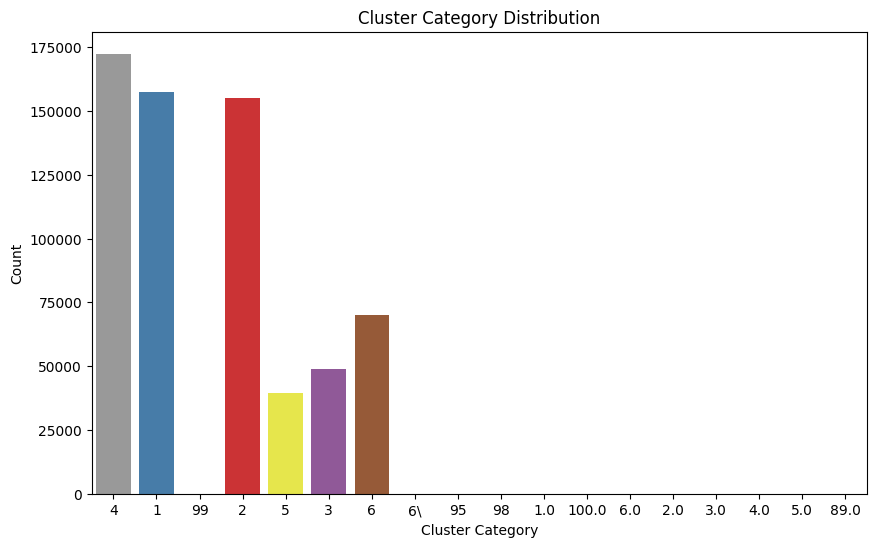

In [28]:
# Plot distribution for the entire DataFrame
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='cluster_category', data=train_data, palette="Set1")
ax.set_title('Cluster Category Distribution')
ax.set_xlabel('Cluster Category')
ax.set_ylabel('Count')

In [29]:
# Remove faulty values from the target variable
train_data['cluster_category'] = train_data['cluster_category'].replace({89.0: np.nan,98: np.nan, 100.0: np.nan, '99': np.nan})
# Replace string values with their integer counterparts
replace_values = {'4': 4, '6': 6, '5': 5, '1': 1, '3': 3, '2': 2, '6\\':6}
train_data['cluster_category'] = train_data['cluster_category'].replace(replace_values)

# Drop rows with NaN values in the target variable
train_data.dropna(subset=['cluster_category'], inplace=True)

# Convert the target variable to integers
train_data['cluster_category'] = train_data['cluster_category'].astype(int)


In [30]:
# Get the rows containing strings in the sales columns
text_rows_luxury = test_data[pd.to_numeric(test_data['luxury_sales'], errors='coerce').isna()]
text_rows_fresh = test_data[pd.to_numeric(test_data['fresh_sales'], errors='coerce').isna()]
text_rows_dry = test_data[pd.to_numeric(test_data['dry_sales'], errors='coerce').isna()]

# Apply the conversion function only to the rows containing strings
text_rows_luxury['luxury_sales'] = text_rows_luxury['luxury_sales'].apply(lambda x: text_to_number(str(x)))
text_rows_fresh['fresh_sales'] = text_rows_fresh['fresh_sales'].apply(lambda x: text_to_number(str(x)))
text_rows_dry['dry_sales'] = text_rows_dry['dry_sales'].apply(lambda x: text_to_number(str(x)))

# Update the original DataFrame with the converted values
test_data.update(text_rows_luxury)
test_data.update(text_rows_fresh)
test_data.update(text_rows_dry)

<ipython-input-30-04419ea27e1a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_rows_luxury['luxury_sales'] = text_rows_luxury['luxury_sales'].apply(lambda x: text_to_number(str(x)))
<ipython-input-30-04419ea27e1a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_rows_fresh['fresh_sales'] = text_rows_fresh['fresh_sales'].apply(lambda x: text_to_number(str(x)))
<ipython-input-30-04419ea27e1a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

In [31]:
non_numeric_rows_luxury = test_data[pd.to_numeric(test_data['luxury_sales'], errors='coerce').isna()]
non_numeric_rows_fresh = test_data[pd.to_numeric(test_data['fresh_sales'], errors='coerce').isna()]
non_numeric_rows_dry = test_data[pd.to_numeric(test_data['dry_sales'], errors='coerce').isna()]

# Get the count of non-numeric rows
count_luxury = len(non_numeric_rows_luxury)
count_fresh = len(non_numeric_rows_fresh)
count_dry = len(non_numeric_rows_dry)

print(f"The number of rows with non-numeric values in 'luxury_sales' column in test_data is: {count_luxury}")
print(f"The number of rows with non-numeric values in 'fresh_sales' column in test_data is: {count_fresh}")
print(f"The number of rows with non-numeric values in 'dry_sales' column in test_data is: {count_dry}")

The number of rows with non-numeric values in 'luxury_sales' column in test_data is: 0
The number of rows with non-numeric values in 'fresh_sales' column in test_data is: 0
The number of rows with non-numeric values in 'dry_sales' column in test_data is: 0


In [32]:
test_data['luxury_sales'] = pd.to_numeric(test_data['luxury_sales'], errors='coerce')
test_data['fresh_sales'] = pd.to_numeric(test_data['fresh_sales'], errors='coerce')
test_data['dry_sales'] = pd.to_numeric(test_data['dry_sales'], errors='coerce')


## 3.2 Encoding categorical variables and Scaling features

Summary Statistics:
        Customer_ID   luxury_sales    fresh_sales      dry_sales  \
count  7.741460e+05  774148.000000  774148.000000  774148.000000   
mean   1.038708e+07    1921.992580    4428.681841    4676.263856   
std    2.234800e+05    1004.087939    3334.621838    3409.359017   
min    1.000000e+07     500.000000     500.000000     500.000000   
25%    1.019354e+07    1213.560000    1620.190000    1787.930000   
50%    1.038708e+07    1715.300000    3356.540000    3727.760000   
75%    1.058062e+07    2338.700000    6671.700000    7162.200000   
max    1.077415e+07    6999.650000   13997.900000   13999.300000   

       cluster_category  
count     774148.000000  
mean           3.292228  
std            1.869919  
min            1.000000  
25%            2.000000  
50%            3.000000  
75%            5.000000  
max           95.000000  


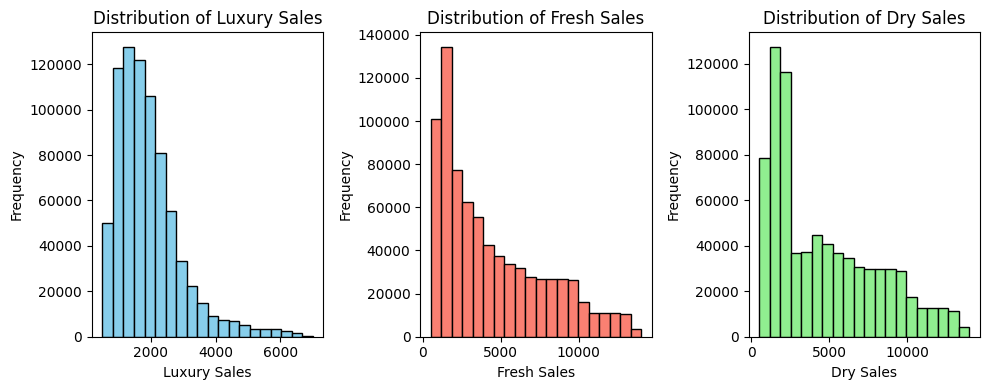

In [33]:
# Summary statistics
summary_stats = train_data.describe()
print("Summary Statistics:")
print(summary_stats)

# Visualize distribution of sales variables using histograms
plt.figure(figsize=(10, 4))

plt.subplot(1, 3, 1)
luxury_sales_hist, luxury_sales_bins, _ = plt.hist(train_data['luxury_sales'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Luxury Sales')
plt.xlabel('Luxury Sales')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
fresh_sales_hist, fresh_sales_bins, _ = plt.hist(train_data['fresh_sales'], bins=20, color='salmon', edgecolor='black')
plt.title('Distribution of Fresh Sales')
plt.xlabel('Fresh Sales')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
dry_sales_hist, dry_sales_bins, _ = plt.hist(train_data['dry_sales'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Dry Sales')
plt.xlabel('Dry Sales')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


<Figure size 1500x1000 with 0 Axes>

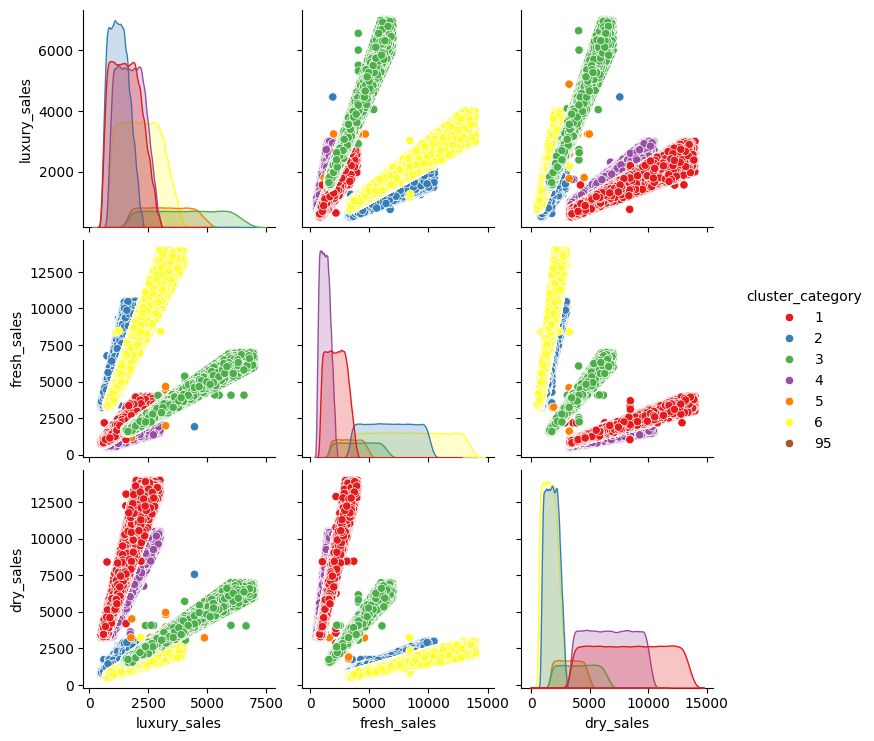

In [40]:
# Drop non-numeric columns
numeric_df = train_data.drop(['Customer_ID', 'outlet_city'], axis=1)
# Plot pair plot with hue of cluster
plt.figure(figsize=(15, 10))
sns.pairplot(numeric_df, hue='cluster_category', palette='Set1')
plt.show()

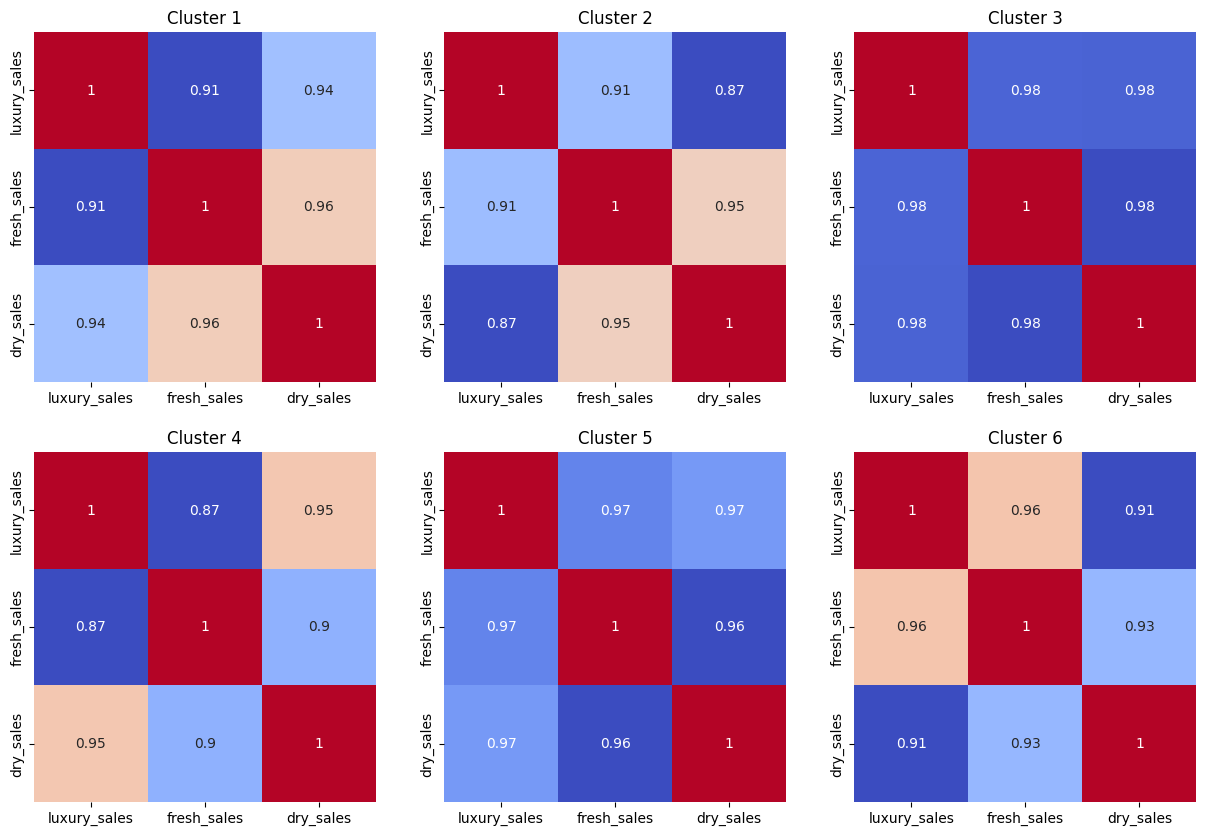

In [41]:
plt.figure(figsize=(15, 10))
#get correlation for each cluster
for i in range (1,7):
    cluster = train_data[train_data['cluster_category'] == i]
    corr = cluster[['luxury_sales', 'fresh_sales', 'dry_sales']].corr()
    plt.subplot(2, 3, i)
    sns.heatmap(corr, annot=True, cmap='coolwarm', cbar=False)
    plt.title(f'Cluster {i}')

In [36]:
print(train_data["outlet_city"].unique())
print(test_data["outlet_city"].unique())

['Kelaniya' 'Moratuwa' 'Wattala' 'Homagama' 'Dehiwala-Mount Lavinia'
 'Panadura' 'Kaduwela' 'Peliyagoda' 'Kotte' 'Nuwara Eliya' 'Batticaloa'
 'Colombo' 'Jaffna' 'Gampaha' 'Kalmunai' 'Galle' 'Katunayake' 'Negombo'
 'Trincomalee' 'Kandy']
['batticaloa' 'Batticaloa' 'Colombo' 'Dehiwala-Mount Lavinia'
 'Anuradhapura' 'Galle' 'Gampaha' 'Homagama' 'Jaffna' 'Kaduwela'
 'Kalmunai' 'kalmunai' 'Kandy' 'Katunayake' 'Kelaniya' 'Madawachiya'
 'Kotte' 'Moratuwa' 'MoraTuwa' 'Negombo' 'Nuwara Eliya' 'Panadura'
 'Peliyagoda' 'PeliyagodA' 'Trincomale' 'Trincomalee' 'Wattala']


In [37]:
# Convert outlet_city column values to lower case
train_data['outlet_city'] = train_data['outlet_city'].str.lower()

# Replace 'trincomale' with 'trincomalee'
train_data['outlet_city'] = train_data['outlet_city'].replace('trincomale', 'trincomalee')

# Convert outlet_city column values to lower case
test_data['outlet_city'] = test_data['outlet_city'].str.lower()

# Replace 'trincomale' with 'trincomalee'
test_data['outlet_city'] = test_data['outlet_city'].replace('trincomale', 'trincomalee')

# Count the number of rows with 'anuradhapura' and 'madawachiya' in the 'outlet_city' column of the test dataset
count_anuradhapura = test_data[test_data['outlet_city'] == 'anuradhapura'].shape[0]
count_madawachiya = test_data[test_data['outlet_city'] == 'madawachiya'].shape[0]

# Display the counts
print("Count of rows with 'anuradhapura':", count_anuradhapura)
print("Count of rows with 'madawachiya':", count_madawachiya)


Count of rows with 'anuradhapura': 1645
Count of rows with 'madawachiya': 1499


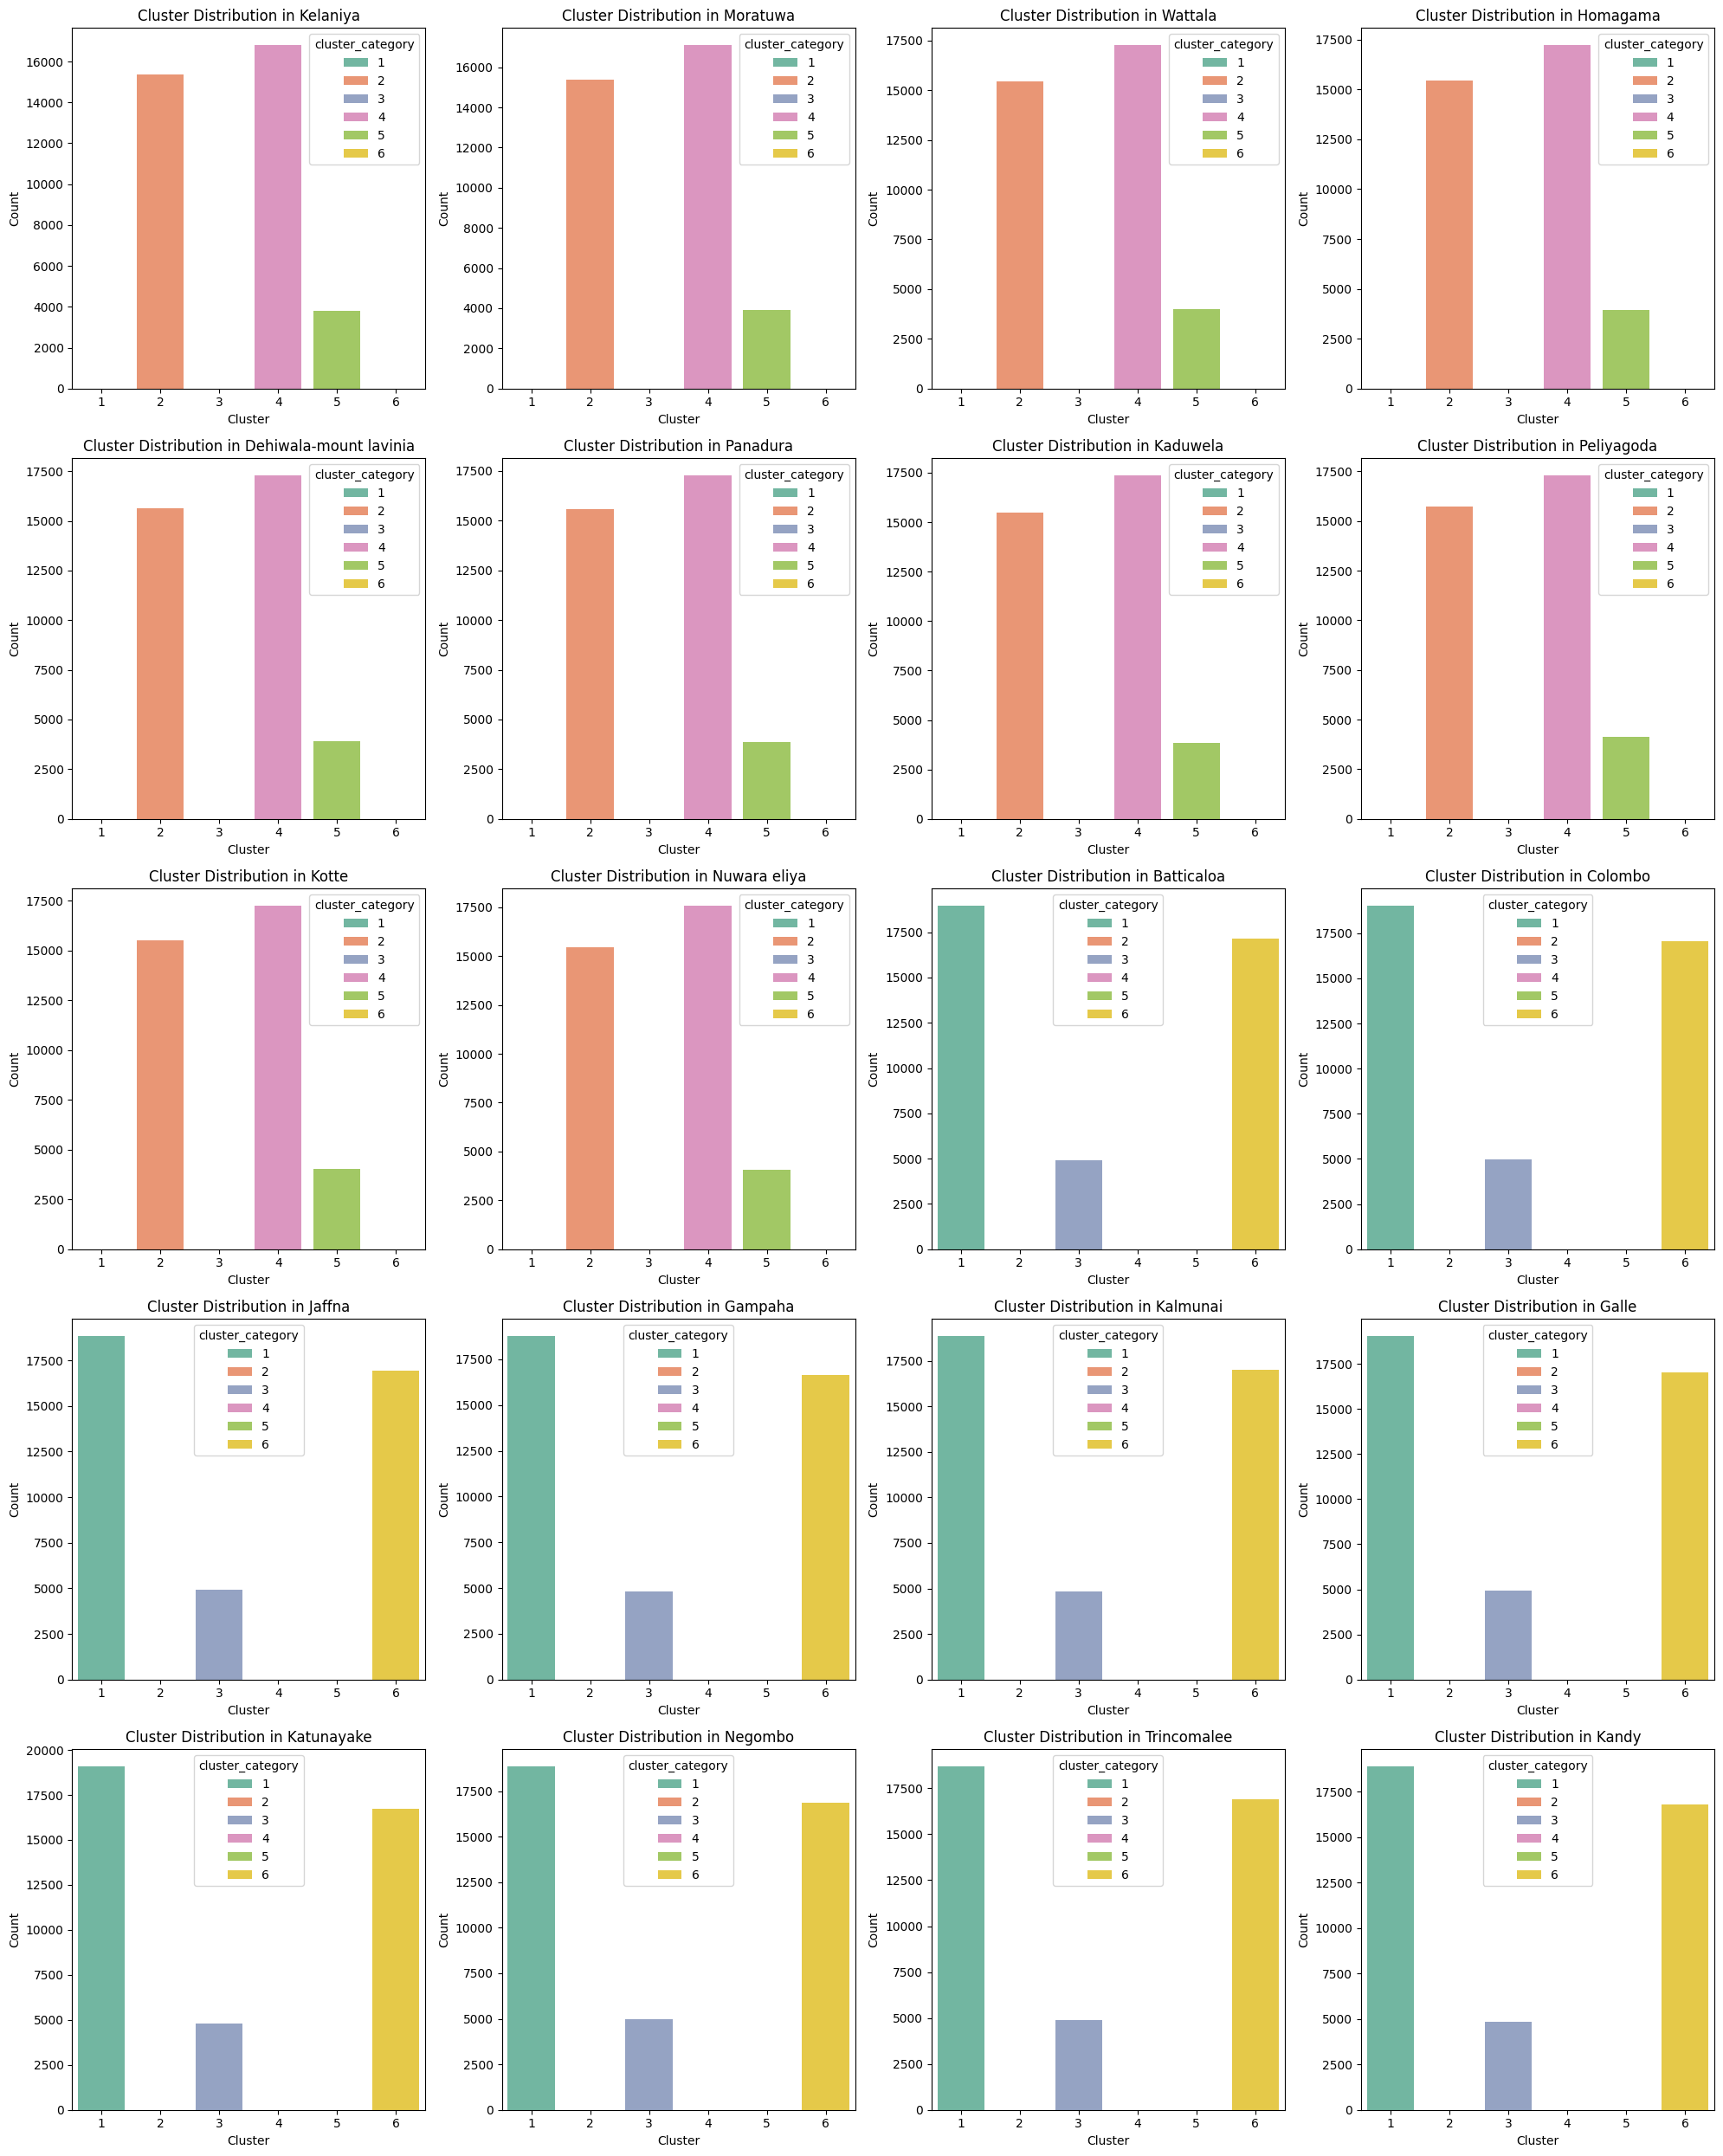

In [39]:
# Create a DataFrame containing all possible combinations of clusters and outlet cities
outlet_cities = train_data["outlet_city"].unique()
clusters = [1, 2, 3, 4, 5, 6]
all_combinations = [(city, cluster) for city in outlet_cities for cluster in clusters]
all_df = pd.DataFrame(all_combinations, columns=['outlet_city', 'cluster_category'])

# Merge with the original DataFrame to fill in missing data
merged_df = pd.merge(all_df, train_data, on=['outlet_city', 'cluster_category'], how='left')

# Plotting setup
plt.figure(figsize=(20, 25))

# Loop through each outlet city to generate count plots
for i, city in enumerate(outlet_cities, start=1):
    city_df = merged_df[merged_df['outlet_city'] == city]

    plt.subplot(5, 4, i)  # Create a 5x4 grid of subplots to accommodate all cities
    sns.countplot(x='cluster_category', data=city_df, hue='cluster_category', palette='Set2', dodge=False, order=clusters)
    plt.title(f'Cluster Distribution in {city.capitalize()}')
    plt.xlabel('Cluster')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [42]:
from scipy.spatial.distance import euclidean

# Calculate Mean Sales Values for Existing Outlet Areas in Training Data
existing_outlet_areas = train_data.groupby('outlet_city').agg({
    'luxury_sales': 'mean',
    'fresh_sales': 'mean',
    'dry_sales': 'mean'
}).reset_index()

# Calculate mean sales values for each outlet area in the test data
mean_sales_test = test_data.groupby('outlet_city').agg({'luxury_sales': 'mean', 'fresh_sales': 'mean', 'dry_sales': 'mean'})

# Get the mean sales values for the new outlet areas
anuradhapura_mean_sales = mean_sales_test.loc['anuradhapura']
madawachiya_mean_sales = mean_sales_test.loc['madawachiya']

# Update the new outlet areas dictionary with the actual mean sales values
new_outlet_areas = {
    'anuradhapura': {'luxury_sales': anuradhapura_mean_sales['luxury_sales'], 'fresh_sales': anuradhapura_mean_sales['fresh_sales'], 'dry_sales': anuradhapura_mean_sales['dry_sales']},
    'madawachiya': {'luxury_sales': madawachiya_mean_sales['luxury_sales'], 'fresh_sales': madawachiya_mean_sales['fresh_sales'], 'dry_sales': madawachiya_mean_sales['dry_sales']}
}


similar_areas = {}
for new_area, new_sales in new_outlet_areas.items():
    distances = {}
    for index, row in existing_outlet_areas.iterrows():
        existing_sales = row[['luxury_sales', 'fresh_sales', 'dry_sales']]
        distance = euclidean(existing_sales, [new_sales['luxury_sales'], new_sales['fresh_sales'], new_sales['dry_sales']])
        distances[row['outlet_city']] = distance
    similar_areas[new_area] = min(distances, key=distances.get)

# Map New Outlet Areas to Most Similar Existing Outlet Areas
for new_area, similar_area in similar_areas.items():
    print(f"New Outlet Area '{new_area}' is similar to Existing Outlet Area '{similar_area}'")


New Outlet Area 'anuradhapura' is similar to Existing Outlet Area 'katunayake'
New Outlet Area 'madawachiya' is similar to Existing Outlet Area 'nuwara eliya'


In [43]:
# Define the replacement mappings
replacement_mapping = {
    'anuradhapura': 'katunayake',
    'madawachiya': 'nuwara eliya'
}

# Replace the new outlet areas with the similar existing outlet areas
test_data['outlet_city'].replace(replacement_mapping, inplace=True)


In [44]:
# Encoding categorical variable 'outlet_city' using one-hot encoding
train_data_encoded = pd.get_dummies(train_data, columns=['outlet_city'])
scaler = StandardScaler()
numerical_columns = ['luxury_sales', 'fresh_sales', 'dry_sales']

train_data_encoded[numerical_columns] = scaler.fit_transform(train_data_encoded[numerical_columns])

# Convert boolean values to integers (1 for True, 0 for False) for 'outlet_city' columns
outlet_city_columns = [col for col in train_data_encoded.columns if col.startswith('outlet_city_')]
train_data_encoded[outlet_city_columns] = train_data_encoded[outlet_city_columns].astype(int)

# Display the first few rows of the updated dataset
print("Encoded and Scaled Dataset with 1s and 0s:")
train_data_encoded.head()

Encoded and Scaled Dataset with 1s and 0s:


,Customer_ID,luxury_sales,fresh_sales,dry_sales,cluster_category,outlet_city_batticaloa,outlet_city_colombo,outlet_city_dehiwala-mount lavinia,outlet_city_galle,outlet_city_gampaha,...,outlet_city_katunayake,outlet_city_kelaniya,outlet_city_kotte,outlet_city_moratuwa,outlet_city_negombo,outlet_city_nuwara eliya,outlet_city_panadura,outlet_city_peliyagoda,outlet_city_trincomalee,outlet_city_wattala
0,10493832.0,-0.709493,-1.101380,0.180602,4,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,10178643.0,-0.330522,-1.010191,0.390354,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,10513916.0,0.365394,-0.883951,1.313813,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,10334589.0,0.351511,-0.806395,1.297458,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,10458365.0,0.421774,-0.707467,1.339762,4,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [45]:
# Encoding categorical variable 'outlet_city' using one-hot encoding
test_data_encoded = pd.get_dummies(test_data, columns=['outlet_city'])

test_data_encoded[numerical_columns] = scaler.fit_transform(test_data_encoded[numerical_columns])
# Convert boolean values to integers (1 for True, 0 for False) for 'outlet_city' columns
outlet_city_columns = [col for col in test_data_encoded.columns if col.startswith('outlet_city_')]
test_data_encoded[outlet_city_columns] = test_data_encoded[outlet_city_columns].astype(int)

# Display the first few rows of the updated dataset
print("Encoded and Scaled Dataset with 1s and 0s:")
test_data_encoded.head()

Encoded and Scaled Dataset with 1s and 0s:


,Customer_ID,luxury_sales,fresh_sales,dry_sales,outlet_city_batticaloa,outlet_city_colombo,outlet_city_dehiwala-mount lavinia,outlet_city_galle,outlet_city_gampaha,outlet_city_homagama,...,outlet_city_katunayake,outlet_city_kelaniya,outlet_city_kotte,outlet_city_moratuwa,outlet_city_negombo,outlet_city_nuwara eliya,outlet_city_panadura,outlet_city_peliyagoda,outlet_city_trincomalee,outlet_city_wattala
0,33574,0.756569,-0.257052,2.300097,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10089,-0.208718,-0.557303,1.394065,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,38329,-1.068982,-0.955614,0.149628,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,11376,-0.287859,-0.633636,1.346014,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12410,-0.884630,-0.873082,0.218043,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
print("Data type of cluster_category:", train_data_encoded['cluster_category'].dtype)
print("Unique values in cluster_category:", train_data_encoded['cluster_category'].unique())

Data type of cluster_category: object
Unique values in cluster_category: ['4' '1' '99' '2' '5' '3' '6' '6\\' 4 2 1 95 3 98 5 6 100.0 89.0]


# 4. Splitting the dataset

In [ ]:
# Splitting the data into features (X) and target variable (y)
y = train_data_encoded['cluster_category']
X = train_data_encoded.drop(columns=['cluster_category','Customer_ID'])


# Splitting the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (619318, 23)
Shape of X_test: (154830, 23)
Shape of y_train: (619318,)
Shape of y_test: (154830,)


# 5. Training the model

In [ ]:
# Instantiate the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the Random Forest Classifier on the training data
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# 6. Evaluating the model


In [ ]:
# Predict the target labels for the testing data
y_pred = rf_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Convert accuracy to percentage
accuracy_percentage = accuracy * 100
print("Accuracy (Percentage): {:.2f}%".format(accuracy_percentage))

# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9997997804043144
Accuracy (Percentage): 99.98%
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     37942
           2       1.00      1.00      1.00     30989
           3       1.00      1.00      1.00      9734
           4       1.00      1.00      1.00     34419
           5       1.00      1.00      1.00      7940
           6       1.00      1.00      1.00     33806

    accuracy                           1.00    154830
   macro avg       1.00      1.00      1.00    154830
weighted avg       1.00      1.00      1.00    154830



# 7. Predicting cluster categories for test data

In [ ]:
# Align columns of test data with training data
test_data_encoded_aligned = test_data_encoded.reindex(columns=X.columns, fill_value=0)

# Predict the cluster category for the test data
test_data_encoded['cluster_category'] = rf_classifier.predict(test_data_encoded_aligned)

# Select the 'Customer_ID' and 'cluster_category' columns
submission_df = test_data_encoded[['Customer_ID', 'cluster_category']]

# Save the DataFrame to a CSV file
submission_df.to_csv('submission.csv', index=False)

# Display the first few rows of the submission DataFrame
print("Submission DataFrame:")
print(submission_df.head())

Submission DataFrame:
   Customer_ID  cluster_category
0        33574                 1
1        10089                 1
2        38329                 1
3        11376                 1
4        12410                 1
